In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv', index_col=0)

In [3]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [4]:
df.describe(include=[object])

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.0+ MB


In [6]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [7]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

# Perform the subtraction
df['Difference'] = df['LastWorkingDate'] - df['Dateofjoining'] 



In [8]:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
Difference                680
dtype: int64

In [9]:
df.drop('MMM-YY', axis=1, inplace=True)

### Feature Engineering

In [10]:
df1 = df.groupby(['Driver_ID']).max().reset_index()

In [11]:
## Business value column
df1['Total Business Value']=df.groupby(['Driver_ID'])['Total Business Value'].sum().reset_index()['Total Business Value']

In [12]:
## Increment Column
df1['Starting_Income']=df.groupby(['Driver_ID'])['Income'].min().reset_index()['Income']
df1['Increment']=df1['Income'] > df1['Starting_Income']
df1['Increment'] = df1['Increment'].apply(lambda x: 1 if x == True else 0)
df1['Increment'].value_counts()

0    2337
1      44
Name: Increment, dtype: int64

In [13]:
## Ratings Column
df1["Start_Rating"] = df.groupby(['Driver_ID'])['Quarterly Rating'].min().reset_index()['Quarterly Rating']
df1['ratings_improve'] = df1['Quarterly Rating'] > df1["Start_Rating"]
df1['ratings_improve'] = df1['ratings_improve'].apply(lambda x: 1 if x == True else 0)
df1['ratings_improve'].value_counts()

0    1277
1    1104
Name: ratings_improve, dtype: int64

Target Variable Creation

In [14]:
df1['Difference'] = df1['Difference'].astype('str')
df1['attrition']=df1['Difference'].apply(lambda x: 1 if x == 'NaT' else 0)

### Removing unwanted columns

In [15]:
df1.drop(['Driver_ID','Dateofjoining', 'LastWorkingDate', 'Quarterly Rating', 'Difference', 'Starting_Income','Start_Rating'], axis=1, inplace=True)

In [16]:
df1.isna().sum()

Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Increment               0
ratings_improve         0
attrition               0
dtype: int64

Statistical Summary of derived dataset

In [17]:
df1.describe()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Increment,ratings_improve,attrition
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000
mean,33.663167,0.410332,1.00756,59336.159597,1.820244,2.097018,4.586742e+06,0.018480,0.463671,0.321294
std,5.983375,0.491997,0.81629,28383.012146,0.841433,0.941702,9.127115e+06,0.134706,0.498783,0.467071
min,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,0.000000,0.000000,0.000000
75%,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,0.000000,1.000000,1.000000
max,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,1.000000,1.000000,1.000000


#### Univariate Analysis and Categorical Columns

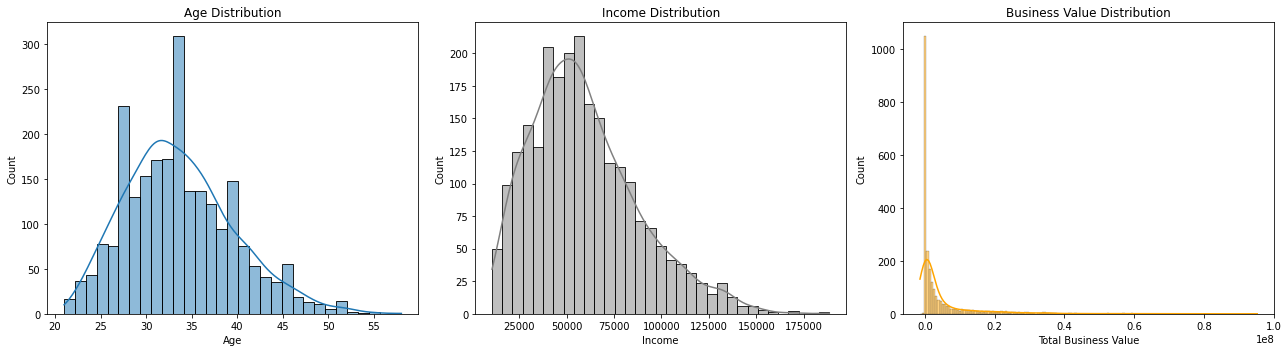

In [18]:
# Set up the subplots
fig, ax1 = plt.subplots(1, 3, figsize=(18, 5))
# Plot Age distribution with KDE
sns.histplot(df1['Age'], kde=True, ax=ax1[0])
ax1[0].set_title('Age Distribution')
# Plot Income distribution with KDE
sns.histplot(df1['Income'], kde=True, ax=ax1[1], color='grey')
ax1[1].set_title('Income Distribution')

sns.histplot(df1['Total Business Value'], kde=True, ax=ax1[2], color='orange')
ax1[2].set_title('Business Value Distribution')
fig.tight_layout()
plt.show()


<Axes: xlabel='City', ylabel='count'>

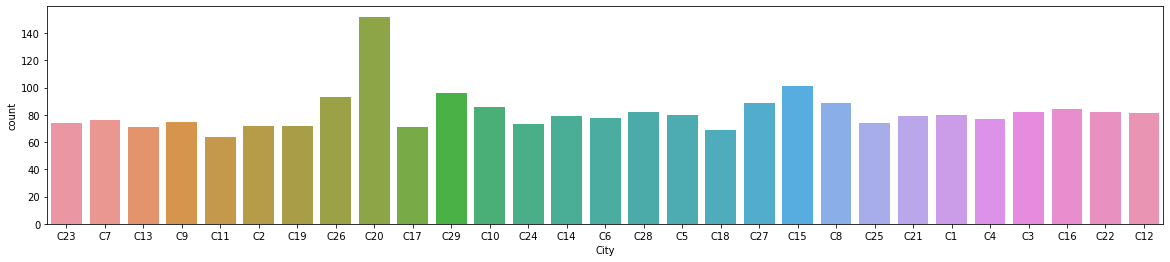

In [19]:
## City
plt.figure(figsize=(20,4))
sns.countplot(df1, x='City')

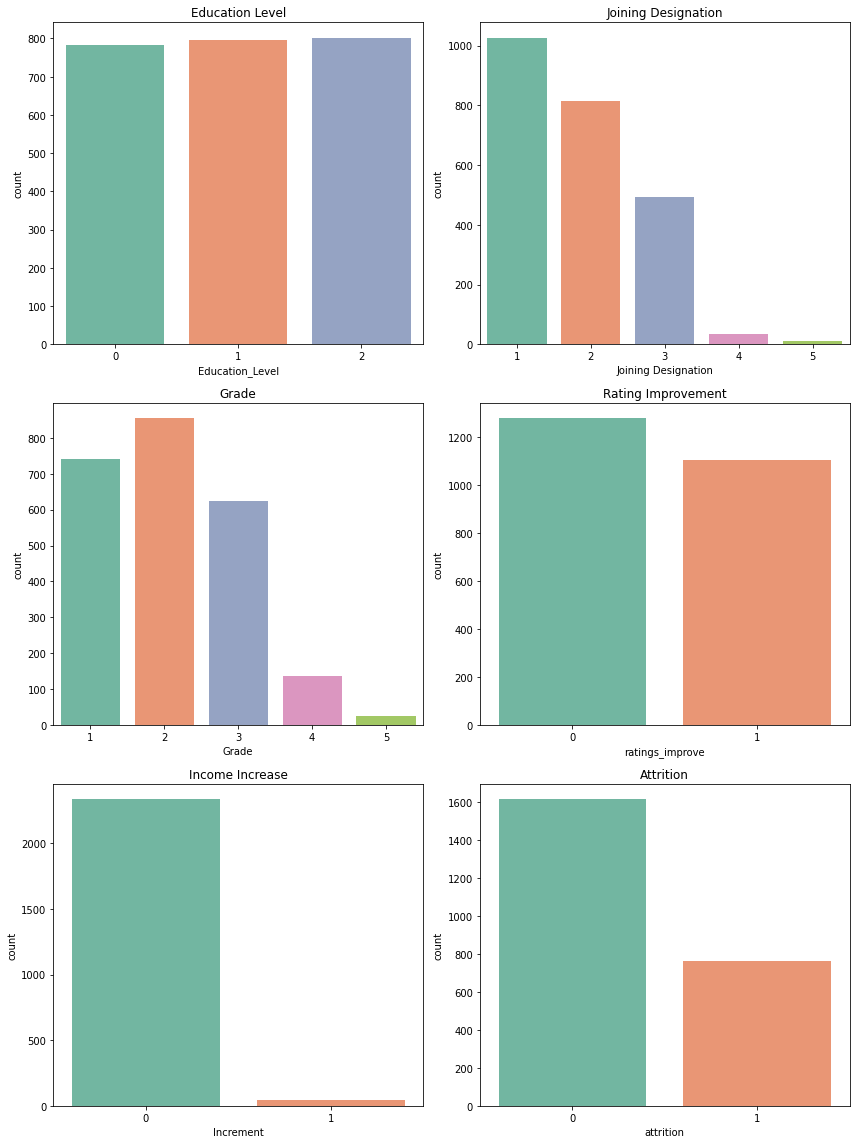

In [20]:
sns.set_palette("Set2")
fig, axs = plt.subplots(3, 2, figsize=(12, 16))

# Plot countplot for Education Level
sns.countplot(data=df1, x='Education_Level', ax=axs[0, 0])
axs[0, 0].set_title('Education Level')

# Plot countplot for Joining Designation
sns.countplot(data=df1, x='Joining Designation', ax=axs[0, 1])
axs[0, 1].set_title('Joining Designation')

# Plot countplot for Grade
sns.countplot(data=df1, x='Grade', ax=axs[1, 0])
axs[1, 0].set_title('Grade')

# Plot countplot for Quarterly Rating
sns.countplot(data=df1, x='ratings_improve', ax=axs[1, 1])
axs[1, 1].set_title('Rating Improvement')

sns.countplot(data=df1, x='Increment', ax=axs[2, 0])
axs[2, 0].set_title('Income Increase')

sns.countplot(data=df1, x='attrition', ax=axs[2, 1])
axs[2, 1].set_title('Attrition')


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [21]:
cat_columns = ['Grade', 'Education_Level', 'Joining Designation', 'Gender', 'City']
df1[cat_columns] = df1[cat_columns].astype('category')

<Axes: >

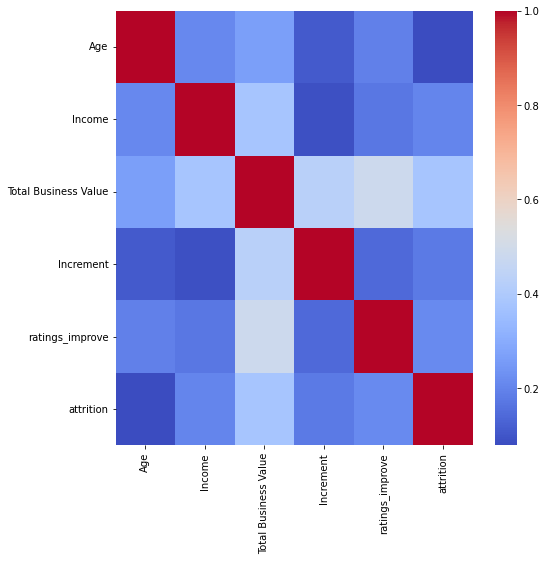

In [22]:
# Correlation Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(df1.corr(), cmap='coolwarm')

In [23]:
#Apply one-hot encoding to the specified columns
df1 = pd.get_dummies(df1, columns=cat_columns)
df1

,Age,Income,Total Business Value,Increment,ratings_improve,attrition,Grade_1,Grade_2,Grade_3,Grade_4,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,28.0,57387,1715580,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,67016,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,43.0,65603,350000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29.0,46368,120360,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,31.0,78728,1265000,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,82815,21748820,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2377,34.0,12105,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2378,45.0,35370,2815090,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2379,28.0,69498,977830,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building The Model

## Imbalance Treatment 

In [24]:
from imblearn.over_sampling import SMOTE

# Assuming df1 is your DataFrame and 'attrition' is the target column
X = df1.drop('attrition', axis=1)
y = df1['attrition']

# Initialize SMOTE with a random state
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df1_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df1_resampled['attrition'] = pd.Series(y_resampled, index=df1_resampled.index)


In [25]:
## Standard Scaling
from sklearn.preprocessing import StandardScaler

# Assuming df1 is your DataFrame
df1_scaled = pd.DataFrame(StandardScaler().fit_transform(df1_resampled), columns=df1_resampled.columns)

In [26]:
df1_scaled['attrition'].value_counts()

-1.0    1616
 1.0    1616
Name: attrition, dtype: int64

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [28]:
X = df1_scaled.drop('attrition', axis=1)
y = df1_scaled['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

In [29]:
bagging_clf.fit(X_train, y_train)

C:\Users\prksh\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Precision: 0.799
Recall: 0.730
F1 score: 0.763


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.75      0.81      0.78       321
         1.0       0.80      0.73      0.76       326

    accuracy                           0.77       647
   macro avg       0.77      0.77      0.77       647
weighted avg       0.77      0.77      0.77       647



In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = bagging_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)



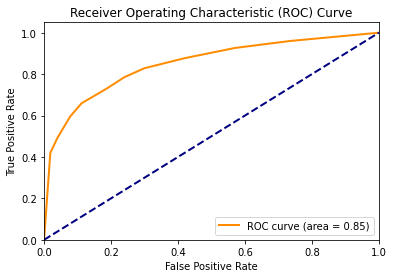

In [33]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [38]:
# Convert y_train and y_test to 0, 1
y_train = np.where(y_train == -1, 0, 1)
y_test = np.where(y_test == -1, 0, 1)


In [45]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]


In [46]:
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("F1 score:", f1)
print("Classification Report:\n", report)


F1 score: 0.7835703001579779
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       321
           1       0.81      0.76      0.78       326

    accuracy                           0.79       647
   macro avg       0.79      0.79      0.79       647
weighted avg       0.79      0.79      0.79       647



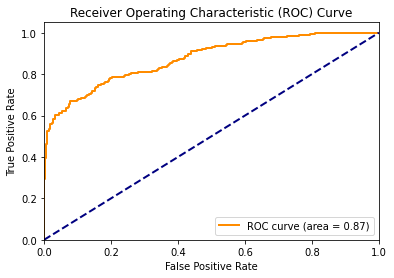

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
